# Data source: https://statso.io/food-delivery-time-prediction-case-study/

# Purpose: 

* Data used to predict food delivery times based on delivery personnel and location details.


# Features

* Delivery Person Attributes: Age, ratings.
* Location Details: Restaurant and delivery locations (latitude, longitude).
* Order Details: Type of order (snack, buffet) and vehicle type.
* Travel Metrics: Distance between locations, delivery time (target).

In [1]:
!pip install geopy

# Python Library

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from geopy.distance import geodesic
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [3]:
data = pd.read_csv("Food Delivery Time Prediction Case Study.csv", encoding='latin1')

In [4]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


# Data preprocessing

In [6]:
# Checking for null values in the dataset
data.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [7]:
# Checking for duplicate values in the dataset
data.duplicated().sum()

0

In [8]:
# Calculating the distance between restaurant and delivery location
data['Distance_km'] = data.apply(lambda row: geodesic(
    (row['Restaurant_latitude'], row['Restaurant_longitude']),
    (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
).km, axis=1)

In [9]:
data['Speed'] = data['Distance_km'] / data['Time_taken(min)']

In [10]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),Distance_km,Speed
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.020737,0.125864
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.143737,0.610416
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.549693,0.059604
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.774497,0.370214
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.197898,0.206597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32,1.488112,0.046503
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36,10.983242,0.305090
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16,4.648024,0.290502
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26,6.219668,0.239218


# EDA

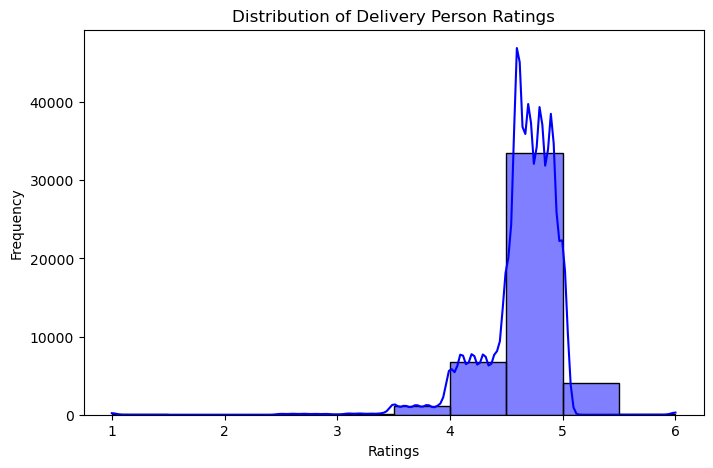

In [32]:
# Distribution of Delivery Person Ratings
plt.figure(figsize=(8, 5))
sns.histplot(data["Delivery_person_Ratings"], bins=10, kde=True, color="blue")
plt.title("Distribution of Delivery Person Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

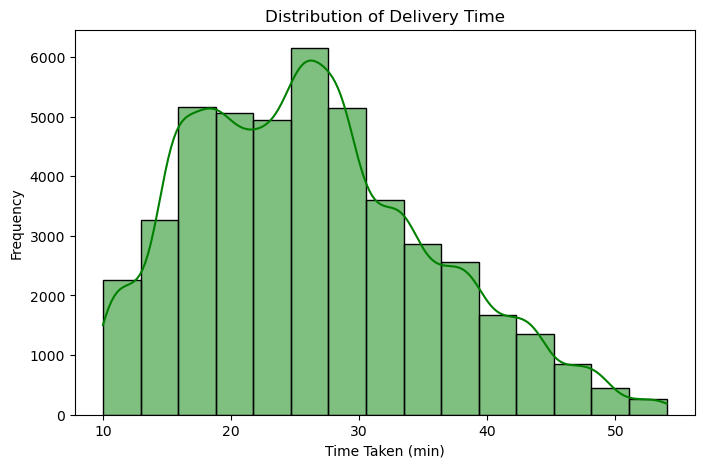

In [34]:
# Distribution of Delivery Time
plt.figure(figsize=(8, 5))
sns.histplot(data["Time_taken(min)"], bins=15, kde=True, color="green")
plt.title("Distribution of Delivery Time")
plt.xlabel("Time Taken (min)")
plt.ylabel("Frequency")
plt.show()

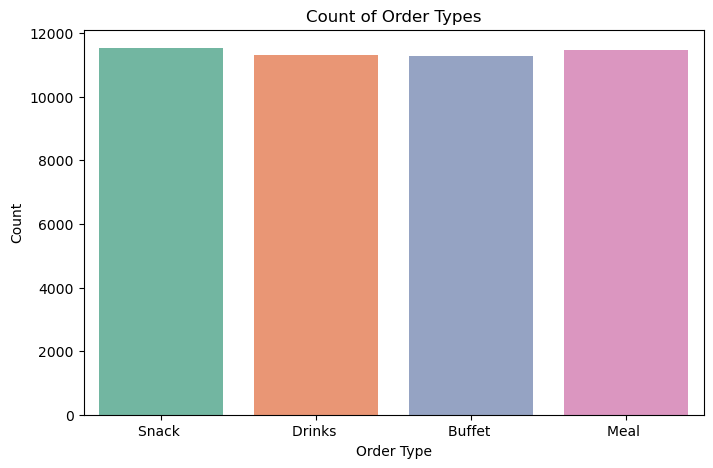

In [35]:
# Count of Different Types of Orders
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="Type_of_order", palette="Set2")
plt.title("Count of Order Types")
plt.xlabel("Order Type")
plt.ylabel("Count")
plt.show()

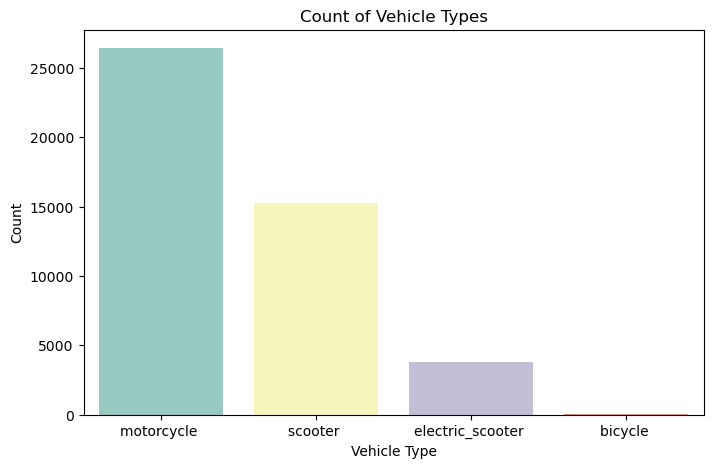

In [36]:
# Count of Different Types of Vehicles
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="Type_of_vehicle", palette="Set3")
plt.title("Count of Vehicle Types")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()

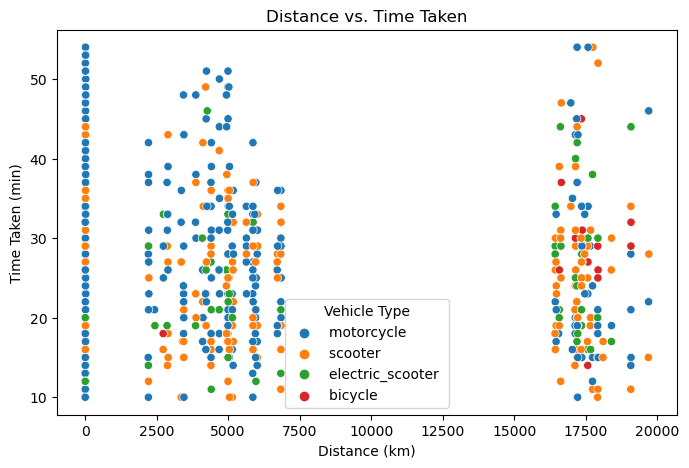

In [37]:
# Relationship between Distance and Time Taken
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="Distance_km", y="Time_taken(min)", hue="Type_of_vehicle")
plt.title("Distance vs. Time Taken")
plt.xlabel("Distance (km)")
plt.ylabel("Time Taken (min)")
plt.legend(title="Vehicle Type")
plt.show()

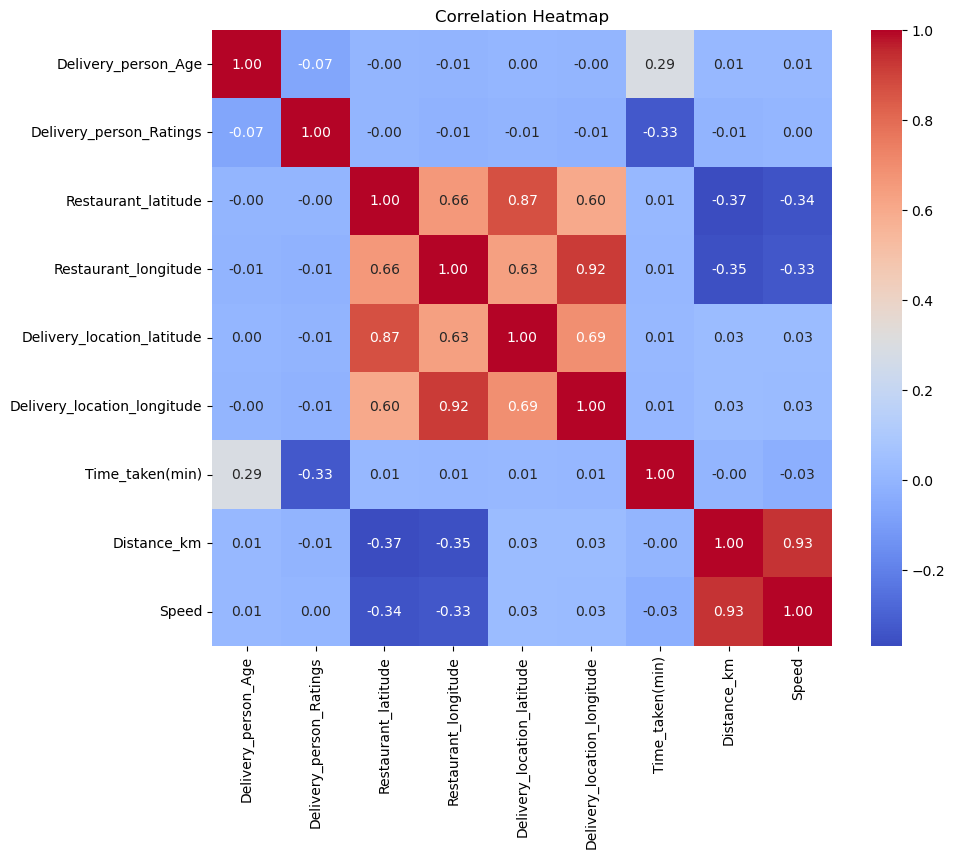

In [41]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

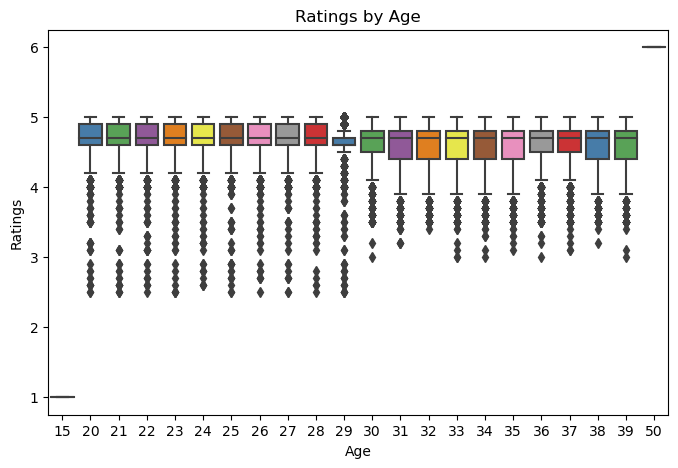

In [43]:
# Delivery Person Age vs Ratings
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="Delivery_person_Age", y="Delivery_person_Ratings", palette="Set1")
plt.title("Ratings by Age")
plt.xlabel("Age")
plt.ylabel("Ratings")
plt.show()

In [48]:
# Delivery Time by Order Type
print("\nAverage Delivery Time by Order Type:")
avg_time_by_order = data.groupby("Type_of_order")["Time_taken(min)"].mean()
print(avg_time_by_order)


Average Delivery Time by Order Type:
Type_of_order
Buffet     26.283511
Drinks     26.187953
Meal       26.419270
Snack      26.286309
Name: Time_taken(min), dtype: float64


# Feature selection

In [11]:
# Selecting important features
feature_columns = ["Delivery_person_Age", "Delivery_person_Ratings", "Distance_km", "Speed"]
X_features = data[feature_columns]
y_target = data['Time_taken(min)']

# Training the model

In [16]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    n_estimators=5,
    criterion='gini',
    max_depth=None,
    random_state=1
)

In [17]:
# Training the classifier
rf_classifier.fit(X_features, y_target)

RandomForestClassifier(n_estimators=5, random_state=1)

# Model evaluation 

In [18]:
# Making predictions on the training data
train_predictions = rf_classifier.predict(X_features)

In [20]:
train_predictions

array([24, 33, 26, ..., 16, 26, 36], dtype=int64)

In [19]:
# Accuracy score
train_accuracy = accuracy_score(train_predictions, y_target)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.99


In [26]:
conf_matrix = confusion_matrix(y_target, train_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[749   1   0 ...   0   0   0]
 [  0 757   0 ...   0   0   0]
 [  1   1 744 ...   0   0   0]
 ...
 [  0   0   0 ...  75   1   0]
 [  0   0   0 ...   2  94   1]
 [  0   0   0 ...   1   5  82]]


In [27]:
# Classification Report
class_report = classification_report(y_target, train_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

          10       1.00      1.00      1.00       750
          11       1.00      1.00      1.00       757
          12       1.00      1.00      1.00       746
          13       1.00      1.00      1.00       716
          14       0.99      1.00      1.00       739
          15       1.00      1.00      1.00      1810
          16       0.99      1.00      1.00      1706
          17       0.99      1.00      1.00      1696
          18       0.99      1.00      1.00      1765
          19       1.00      1.00      1.00      1824
          20       0.99      0.99      0.99      1640
          21       0.98      0.99      0.99      1601
          22       0.99      0.99      0.99      1626
          23       1.00      1.00      1.00      1643
          24       1.00      0.99      0.99      1680
          25       0.99      1.00      0.99      2050
          26       0.99      1.00      0.99      2123
   

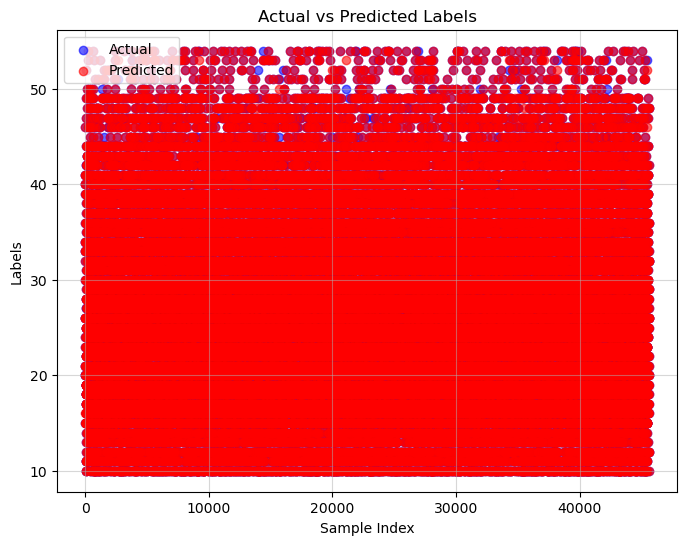

In [28]:
# Predicting the labels on the same dataset or test set
predictions = rf_classifier.predict(X_features) 

# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_target)), y_target, color='blue', label='Actual', alpha=0.6)  # True values
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted', alpha=0.6)  # Predicted values

plt.title('Actual vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Labels')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

In [54]:
model = "random_forest_classifier.pkl"
joblib.dump(rf_classifier, model)
print(f"Model saved as {model}")

Model saved as random_forest_classifier.pkl
